In [2]:
# Data handling and numerical operations
import pandas as pd                                 # Data manipulation and analysis
import numpy as np                                  # Numerical operations

# Data visualization
import matplotlib.pyplot as plt                     # Plotting graphs
import seaborn as sns                               # Advanced data visualization

# Natural Language Processing libraries
import nltk
from nltk.corpus import stopwords                   # Stopwords in text processing
from nltk.stem.porter import PorterStemmer          # Stemming words
import re                                           # Regular expression operations
from wordcloud import WordCloud, STOPWORDS          # Generating word cloud visualizations

# Tensorflow and huggingface
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification, BertConfig

# Scikit-learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.pipeline import Pipeline

# Utility libraries
import chardet                                      # Detecting character encoding
from collections import Counter
from scipy.sparse import hstack                # Handling collections of data

from urllib.parse import urlparse                   # parsing base url values
%matplotlib inline
# Downloading NLTK resources
nltk.download('stopwords')

c:\Users\TOSHIBA\Documents\Sentiment_Analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TOSHIBA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Reading the stored data
df = pd.read_feather("../Data/Full_Data_wostem.feather")

In [4]:
df

,text,sentiment
0,video i was in my office i was minding my own ...,0
1,the price of lumber lb f is down since hitting...,0
2,who says the american dream is dead,-1
3,barry silbert is extremely optimistic on bitco...,1
4,how satellites avoid attacks and space junk wh...,-1
...,...,...
40184,once all bitcoins are mined the miners will ha...,-1
40185,this is the perfect time to buy luna,1
40186,btc is fairly analogous to gold no intrinsic v...,1
40187,preach it brother glad ltc is finally taking a...,1


In [5]:
duplicate = df[df.duplicated()]
print(f"Duplicate Rows : {duplicate}")

Duplicate Rows :                                                     text  sentiment
29     arthur j gallagher amp co ajg vs marsh amp mcl...         -1
35       avery dennison corporation avy eps estimated at          0
52     rt t theres goes sode breaking things again at...          0
55     rt t theres goes sode breaking things again at...          0
61     rt what s shaking guys inflation amp bank earn...          0
...                                                  ...        ...
40008  yup still mega bullish on dots canary chain ku...          1
40023                               good cheaper bitcoin          1
40045  not gonna trust this horrific guy and never go...         -1
40049  there has been three fraudulent scam coins fro...         -1
40105  it s going on sale i m gonna get so fat on bit...          1

[10651 rows x 2 columns]


In [6]:
df.head(10)

,text,sentiment
0,video i was in my office i was minding my own ...,0
1,the price of lumber lb f is down since hitting...,0
2,who says the american dream is dead,-1
3,barry silbert is extremely optimistic on bitco...,1
4,how satellites avoid attacks and space junk wh...,-1
5,s david butler s favorite fang stock isn t rea...,0
6,don t miss my convo with one of my favorite th...,0
7,u s intelligence documents on nelson mandela m...,0
8,senate wants emergency alerts to go out throug...,1
9,hedge fund manager marc larsy says bitcoin k i...,0


In [8]:
df.drop_duplicates(subset=['text'], inplace=True)

In [9]:
df.reset_index(inplace=True, drop = True)

In [10]:
len(df)

29028

In [11]:
X = df['text']
Y = df['sentiment']

In [12]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import pipeline

In [13]:
model = TFBertForSequenceClassification.from_pretrained("ProsusAI/finbert",num_labels=3, from_pt=True)
tokenizer = BertTokenizer.from_pretrained("ProsusAI/finbert")
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [14]:
sentiment_mapping = {1: 'positive', -1: 'negative', 0:'neutral'}
Y= df['sentiment'].map(sentiment_mapping)

In [15]:
Y

0         neutral
1         neutral
2        negative
3        positive
4        negative
           ...   
29023    negative
29024    positive
29025    positive
29026    positive
29027    negative
Name: sentiment, Length: 29028, dtype: object

In [16]:
sentences=[]
for text in df['text']:
    sentences.append(text)
sentences

['video i was in my office i was minding my own business david solomon tells gs interns how he learned he wa',
 'the price of lumber lb f is down since hitting its ytd highs the macy s m turnaround is still happening',
 'who says the american dream is dead',
 'barry silbert is extremely optimistic on bitcoin but predicts that of new crypto entrants are going to zero',
 'how satellites avoid attacks and space junk while circling the earth paid',
 's david butler s favorite fang stock isn t realmoneysod alphabet but facebook',
 'don t miss my convo with one of my favorite thinkers',
 'u s intelligence documents on nelson mandela made public',
 'senate wants emergency alerts to go out through netflix spotify etc by',
 'hedge fund manager marc larsy says bitcoin k is possible',
 'u s proposes expedited appeal in fight with at amp t over time warner purchase',
 'roger federer s uniqlo deal makes him one of the few athletes to earn more than m from endorsements',
 'bond traders are ahead of 

In [17]:
results = nlp(sentences[0:10])
print(results)

[{'label': 'neutral', 'score': 0.9203035235404968}, {'label': 'negative', 'score': 0.9306303262710571}, {'label': 'neutral', 'score': 0.8756234049797058}, {'label': 'positive', 'score': 0.5864161252975464}, {'label': 'neutral', 'score': 0.9285736680030823}, {'label': 'neutral', 'score': 0.9436076879501343}, {'label': 'neutral', 'score': 0.9105563759803772}, {'label': 'neutral', 'score': 0.8753647208213806}, {'label': 'neutral', 'score': 0.9286176562309265}, {'label': 'neutral', 'score': 0.7307188510894775}]


In [18]:
predicted_labels = []
for result in results:
    predicted_labels.append(result['label'])

In [19]:
predicted_labels

['neutral',
 'negative',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral']

In [20]:
# Calculate evaluation metrics
print(classification_report(Y[0:10], predicted_labels))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         2
     neutral       0.62      0.83      0.71         6
    positive       1.00      0.50      0.67         2

    accuracy                           0.60        10
   macro avg       0.54      0.44      0.46        10
weighted avg       0.57      0.60      0.56        10



In [21]:
# confusion matrix
cm = confusion_matrix(Y[0:10], predicted_labels)
cm

array([[0, 2, 0],
       [1, 5, 0],
       [0, 1, 1]], dtype=int64)

In [22]:
# printing confusion matrix
def plot_conf_mat(cm):
    class_names=['Negative', 'Neutral', 'Positive'] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, labels=[-1,0,1])
    plt.yticks(tick_marks, labels=class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

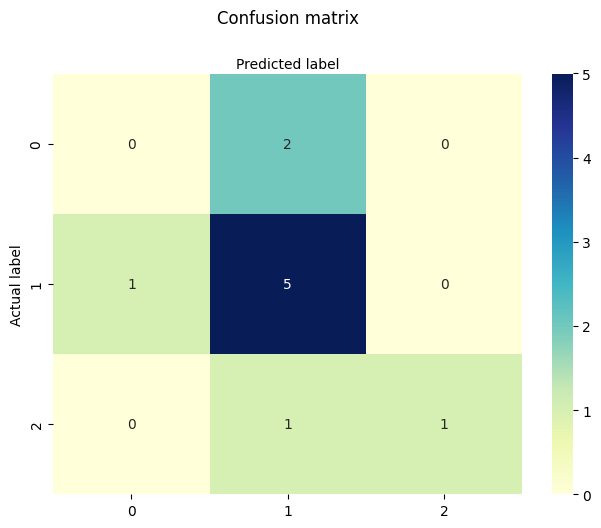

In [23]:
# plotting confusion matrix
plot_conf_mat(cm)